In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import os

In [82]:
filename = 'newyork.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           49 non-null     int64 
 1   Month          49 non-null     int64 
 2   Provider       49 non-null     object
 3   Location       49 non-null     object
 4   System ID      49 non-null     int64 
 5   # of Sessions  49 non-null     int64 
 6   # of Users     49 non-null     int64 
 7   # of Minutes   49 non-null     int64 
 8   MB Received    49 non-null     int64 
 9   MB Sent        49 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 4.0+ KB
None


,Year,Month,Provider,Location,System ID,# of Sessions,# of Users,# of Minutes,MB Received,MB Sent
0,2012,12,Van Wagner,30-94 Steinway St; Phone Kiosk; Astoria; NY,24336,168,80,15768,10747,788
1,2012,12,Van Wagner,Phone Kiosk near Burger King @ Richmond Ave & ...,24335,257,112,17733,6742,743
2,2012,12,Van Wagner,Phone Kiosk Fulton St & Albee Square; Brooklyn...,24334,254,189,24043,7376,412
3,2012,12,Van Wagner,Phone Kiosk @ Smith and Fulton St in Fulton M...,24332,0,0,0,0,0
4,2012,12,Van Wagner,Phone Kiosk W Bway & Spring St; Phone Kiosk; N...,24331,160,146,8350,2835,300


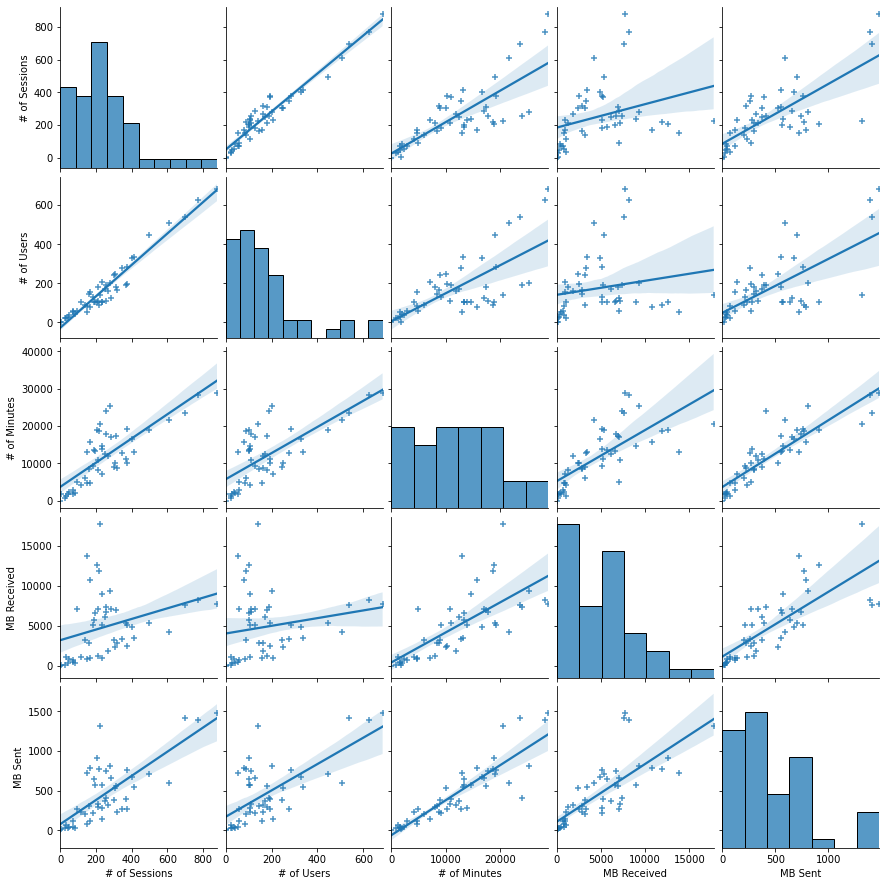

In [84]:
sns.pairplot(df[['# of Sessions', '# of Users','# of Minutes', 'MB Received', 'MB Sent' ]], kind='reg', markers='+') 

In [85]:
filename = 'admissions.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


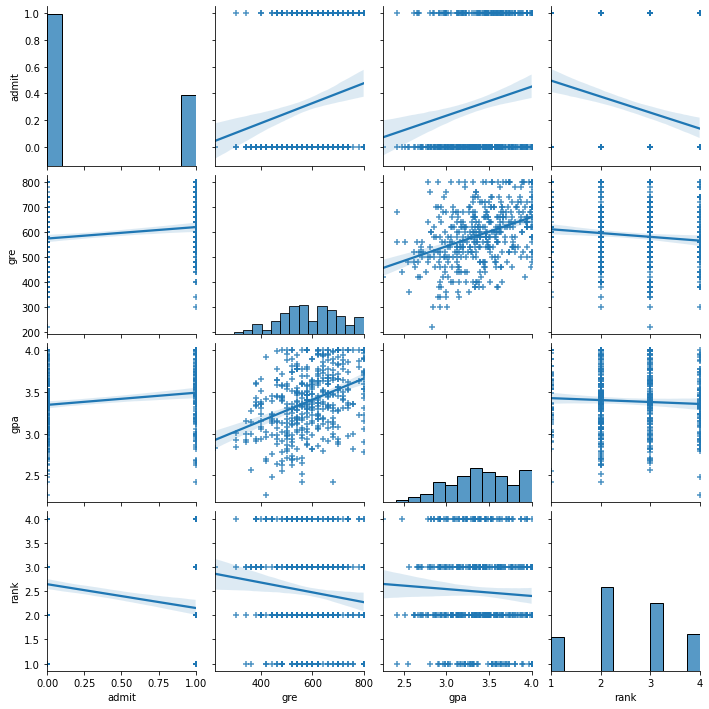

In [87]:
sns.pairplot(df, kind='reg', markers='+') 

In [89]:
filename = 'balance.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB
None


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400.0,200.500000,115.614301,1.000,100.75000,200.5000,300.25000,400.000
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


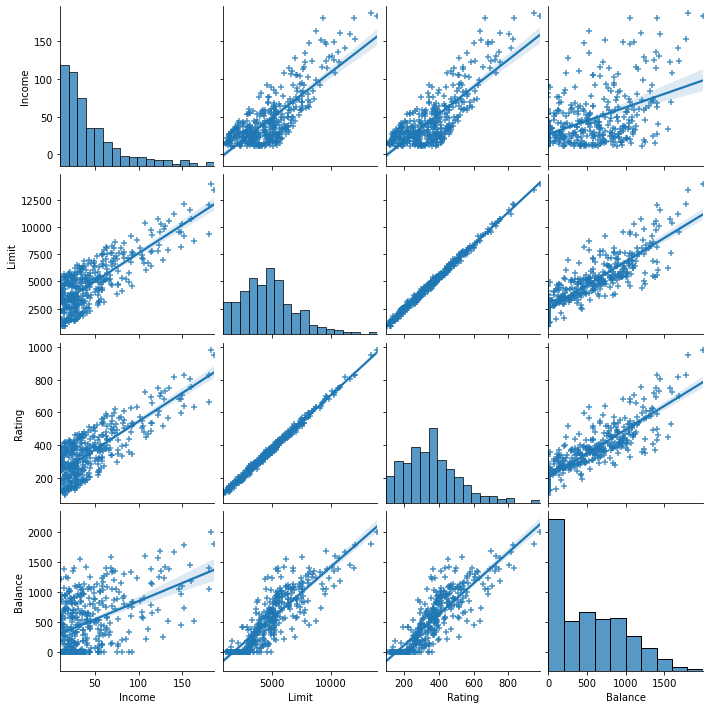

In [91]:
sns.pairplot(df[['Income', 'Limit','Rating', 'Balance']], kind='reg', markers='+') 

In [92]:
filename = 'chicago.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   MONTH                          31 non-null     object
 1   YEAR                           31 non-null     int64 
 2   NUMBER OF SESSIONS             31 non-null     int64 
 3   CUMULATIVE NUMBER OF SESSIONS  31 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None


,MONTH,YEAR,NUMBER OF SESSIONS,CUMULATIVE NUMBER OF SESSIONS
0,January,2011,22263,22263
1,February,2011,19657,41920
2,March,2011,24506,66426
3,April,2011,23998,90424
4,May,2011,23242,113666


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,31.0,2011.838710,0.778750,2011.0,2011.0,2012.0,2012.0,2013.0
NUMBER OF SESSIONS,31.0,49945.483871,32908.622279,19657.0,32278.0,39164.0,52260.0,146590.0
CUMULATIVE NUMBER OF SESSIONS,31.0,562953.548387,422877.563576,22263.0,217736.0,479141.0,841745.5,1548310.0


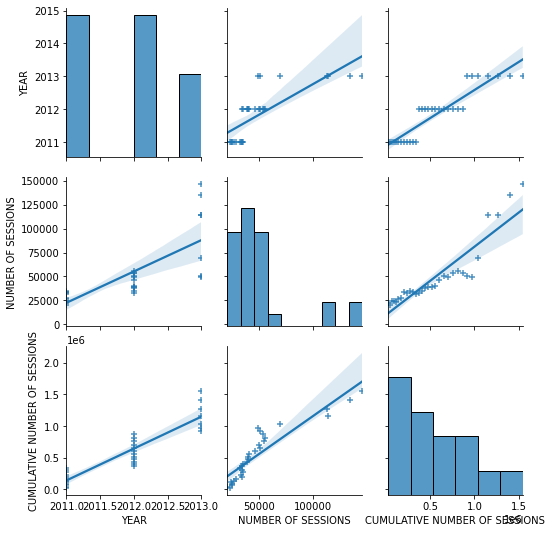

In [94]:
sns.pairplot(df, kind='reg', markers='+') 

In [95]:
filename = 'insects.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath, header=1, sep='\s+')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   continent  42 non-null     int64  
 1   latitude   42 non-null     float64
 2   wingsize   42 non-null     int64  
 3   sex        42 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB
None


,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
continent,42.0,0.52381,0.505487,0.0,0.0,1.0,1.0,1.0
latitude,42.0,44.60000,5.637592,35.5,40.7,45.0,48.8,56.1
wingsize,42.0,864.52381,52.276581,789.0,812.5,872.0,914.5,944.0
sex,42.0,0.50000,0.506061,0.0,0.0,0.5,1.0,1.0


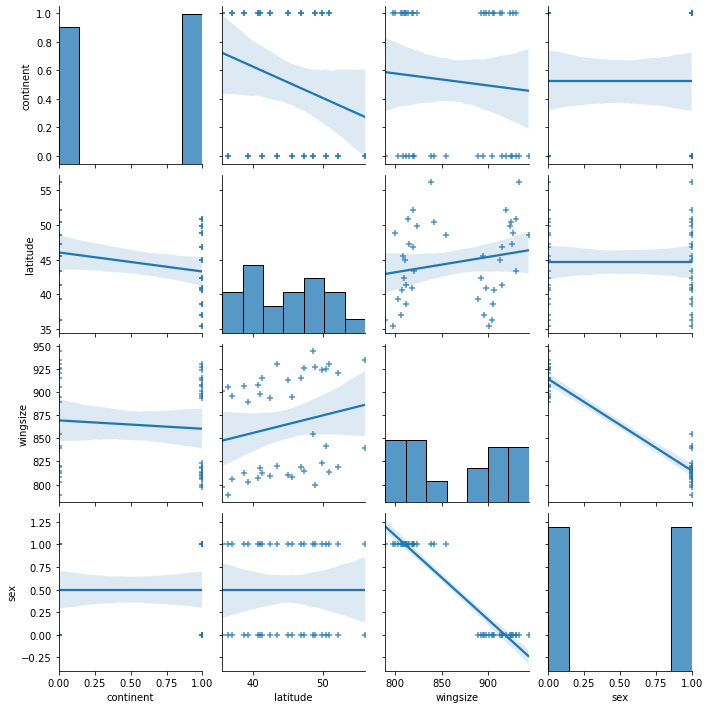

In [97]:
sns.pairplot(df, kind='reg', markers='+') 

In [98]:
filename = 'iris.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150.0,74.500000,43.445368,0.0,37.25,74.50,111.75,149.0
sepal_length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


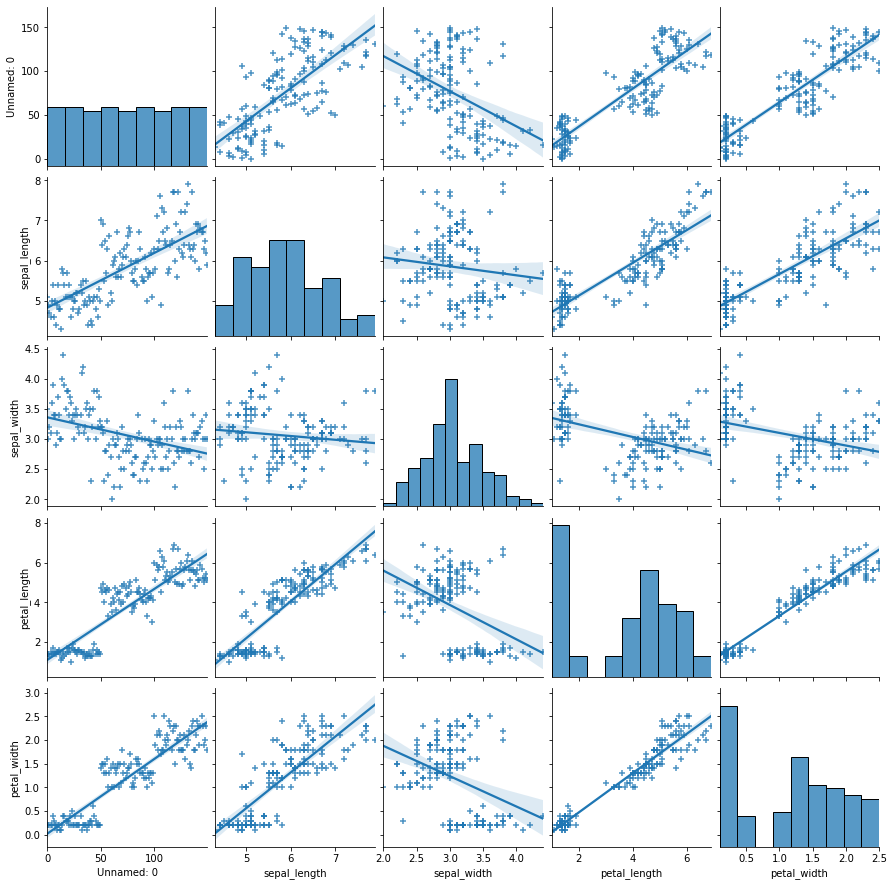

In [100]:
sns.pairplot(df, kind='reg', markers='+') 

In [76]:
df = sns.load_dataset('tips')
print(df.info(), '\n');
print(df.head(), '\n');

df.describe().T
df.to_csv('../data/tips.csv', index=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 



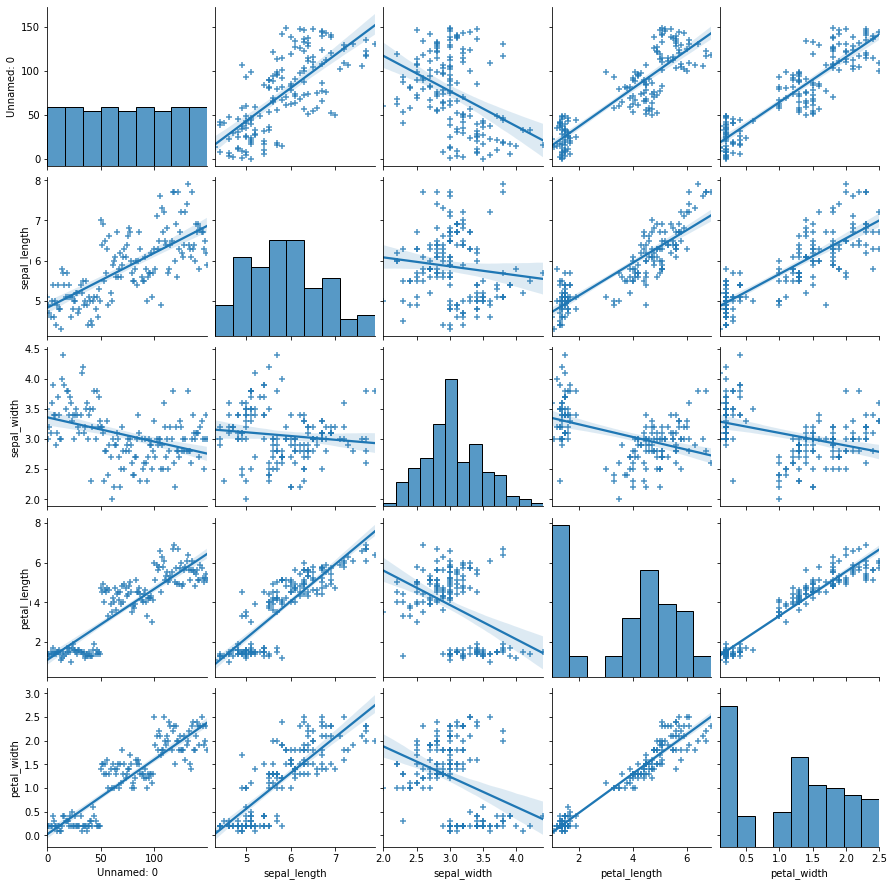

In [101]:
sns.pairplot(df, kind='reg', markers='+') 

In [75]:
df = sns.load_dataset('diamonds')
print(df.info(), '\n');
print(df.head(), '\n');

df.describe().T
df.to_csv('../data/diamonds.csv', index=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None 

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.6

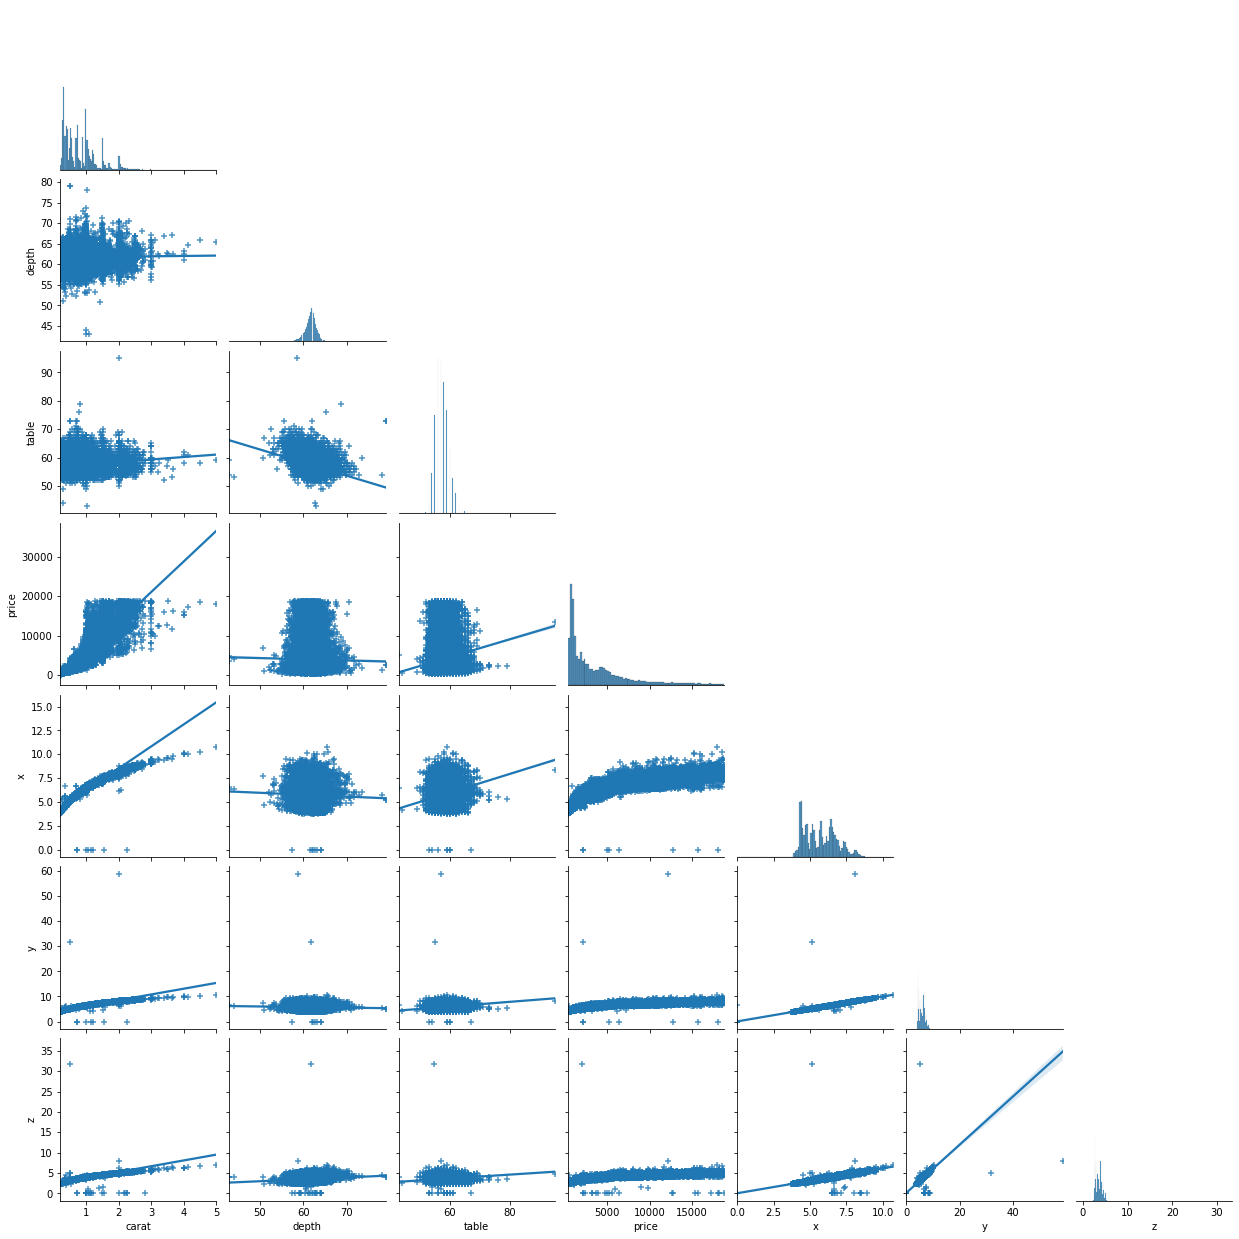

In [62]:
sns.pairplot(df, corner=True, kind='reg', markers='+') 

In [74]:
df = sns.load_dataset('geyser')
print(df.info(), '\n');
print(df.head(), '\n');

df.describe().T
df.to_csv('../data/geyser.csv', index=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB
None 

   duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long 



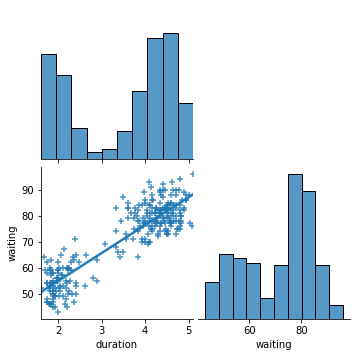

In [67]:
sns.pairplot(df, corner=True, kind='reg', markers='+') 